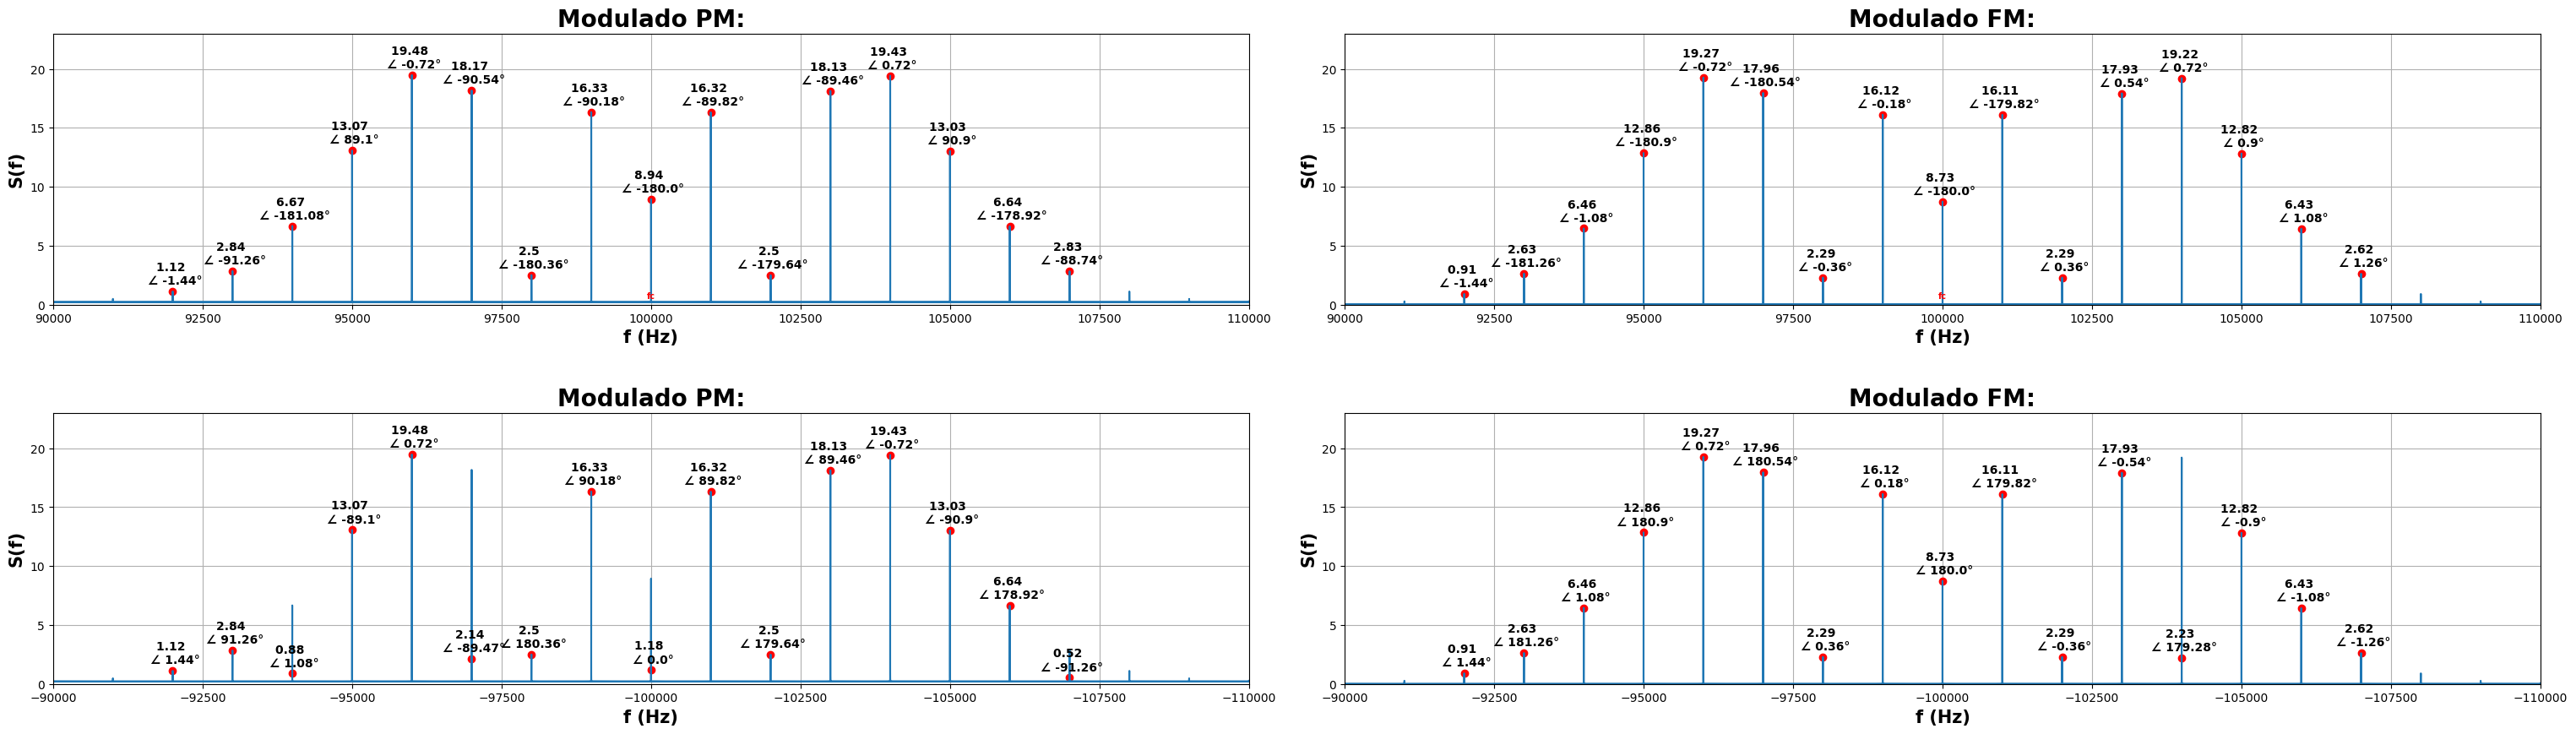

In [1]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

Am_pm = 1/2
Am_fm = 1/4
fm = 1e3
fc = 1e5
Ac = 100
kp = 10
kf = 2e4

T_t = 10
N = 10000000
Ts = T_t/N

t = np.linspace(0, T_t, N)

#----------------------------------------------------------------------------------------PM

m_t = np.cos(2*np.pi*fm*t)
s_t = Ac * np.cos(2*np.pi*fc*t + Am_pm*kp*m_t)

'''
#Colocando janela
from scipy.signal.windows import hamming
s_t *= hamming(N)
'''
s_f = fft(s_t)
freq = fftfreq(N, Ts)

mod_s_f = 1.0/N * np.abs(s_f)
fase_s_f = np.angle(s_f)*180/np.pi

#Corrigir
mod_s_f +=0.21
fase_s_f[freq>=0] -= 18
fase_s_f[freq<0] += 18

# Colocar o valor em pontos específicos
threshold = 0.5
validos = np.where(mod_s_f > threshold)[0]

# Reduzir valores muito próximos
tolerance = 8
grouped_validos = []
current_group = [validos[0]]
for i in range(1, len(validos)):
    if freq[validos[i]] - freq[validos[i - 1]] < tolerance:
        current_group.append(validos[i])
    else:
        # Calcular a média e adicionar ao grupo reduzido
        average_index = int(np.mean(current_group))
        grouped_validos.append(average_index)
        current_group = [validos[i]]

# Adicionar o último grupo
average_index = int(np.mean(current_group))
grouped_validos.append(average_index)

#------------------------Plotando

#-------PM bilateral
fig = plt.figure(figsize = (38,10))
axs = fig.subplots(2,2)
for i in range(2):
  # Adicionar os pontos marcados
  for marc_pon in grouped_validos:
      etiqueta = f'{np.around(mod_s_f[marc_pon], 2)} \n ∠ {np.around(fase_s_f[marc_pon], 2)}°'
      axs[i,0].annotate(etiqueta, (freq[marc_pon], mod_s_f[marc_pon]), textcoords="offset points", xytext=(0, 6),
                  ha="center", fontweight='bold')
      axs[i,0].plot(freq[marc_pon], mod_s_f[marc_pon], 'ro')

  axs[i,0].annotate('fc', (freq[freq == fc],0), textcoords="offset points", xytext=(0, 5),
                  ha="center", fontweight='bold',fontsize = 7,color = 'red')

  axs[i,0].plot(freq, mod_s_f)
  axs[i,0].set_title('Modulado PM:',fontweight='bold',fontsize = 20)
  axs[i,0].set_xlabel('f (Hz)',fontweight='bold',fontsize = 15)
  axs[i,0].set_ylabel('S(f)',fontweight='bold',fontsize = 15)
  axs[i,0].axis([((-1)**i)*0.9*fc, ((-1)**i)*1.1*fc, 0, 23])
  axs[i,0].grid()

#----------------------------------------------------------------------------------------FM

I_m = Am_fm*np.sin(2*np.pi*fm*t)/(2*np.pi*fm) #Integrando manuamente

s_t = Ac * np.cos(2*np.pi*fc*t + 2*np.pi*kf*I_m)

s_f = fft(s_t)
freq = fftfreq(N, Ts)

mod_s_f = 1.0/N * np.abs(s_f)
fase_s_f = np.angle(s_f)*180/np.pi

#Corrigir
#mod_s_f +=0.21
fase_s_f[freq>=0] -= 18
fase_s_f[freq<0] += 18

# Colocar o valor em pontos específicos
threshold = 0.5
validos = np.where(mod_s_f > threshold)[0]

# Reduzir valores muito próximos
tolerance = 8
grouped_validos = []
current_group = [validos[0]]
for i in range(1, len(validos)):
    if freq[validos[i]] - freq[validos[i - 1]] < tolerance:
        current_group.append(validos[i])
    else:
        # Calcular a média e adicionar ao grupo reduzido
        average_index = int(np.mean(current_group))
        grouped_validos.append(average_index)
        current_group = [validos[i]]

# Adicionar o último grupo
average_index = int(np.mean(current_group))
grouped_validos.append(average_index)

#-------Ploatando

for i in range(2):
  # Adicionar os pontos marcados
  for marc_pon in grouped_validos:
      etiqueta = f'{np.around(mod_s_f[marc_pon], 2)} \n ∠ {np.around(fase_s_f[marc_pon], 2)}°'
      axs[i,1].annotate(etiqueta, (freq[marc_pon], mod_s_f[marc_pon]), textcoords="offset points", xytext=(0, 6),
                  ha="center", fontweight='bold')
      axs[i,1].plot(freq[marc_pon], mod_s_f[marc_pon], 'ro')

  axs[i,1].annotate('fc', (freq[freq == fc],0), textcoords="offset points", xytext=(0, 5),
                  ha="center", fontweight='bold',fontsize = 7,color = 'red')

  axs[i,1].plot(freq, mod_s_f)
  axs[i,1].set_title('Modulado FM:',fontweight='bold',fontsize = 20)
  axs[i,1].set_xlabel('f (Hz)',fontweight='bold',fontsize = 15)
  axs[i,1].set_ylabel('S(f)',fontweight='bold',fontsize = 15)
  axs[i,1].axis([((-1)**i)*0.9*fc, ((-1)**i)*1.1*fc, 0, 23])
  axs[i,1].grid()

#ajustando as distancias dos subplots
plt.subplots_adjust(left=None, bottom=None, right=None,top=None, wspace=0.08, hspace=0.4)
plt.show()

